## Load the data

### Subtask:
Load the diabetes dataset using pandas.


**Reasoning**:
Import pandas and load the dataset into a DataFrame.



In [1]:
import pandas as pd

df = pd.read_csv(r'C:\Users\Admin\Documents\EXCELR\DS Assignments\@\diabetes1.csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Perform eda

### Subtask:
Check for missing values, explore data distributions, and visualize relationships between features and the target variable.


**Reasoning**:
Check for missing values and display descriptive statistics.



In [2]:
display(df.isnull().sum())
display(df.describe())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Reasoning**:
Visualize the distribution of numerical features using histograms and box plots.



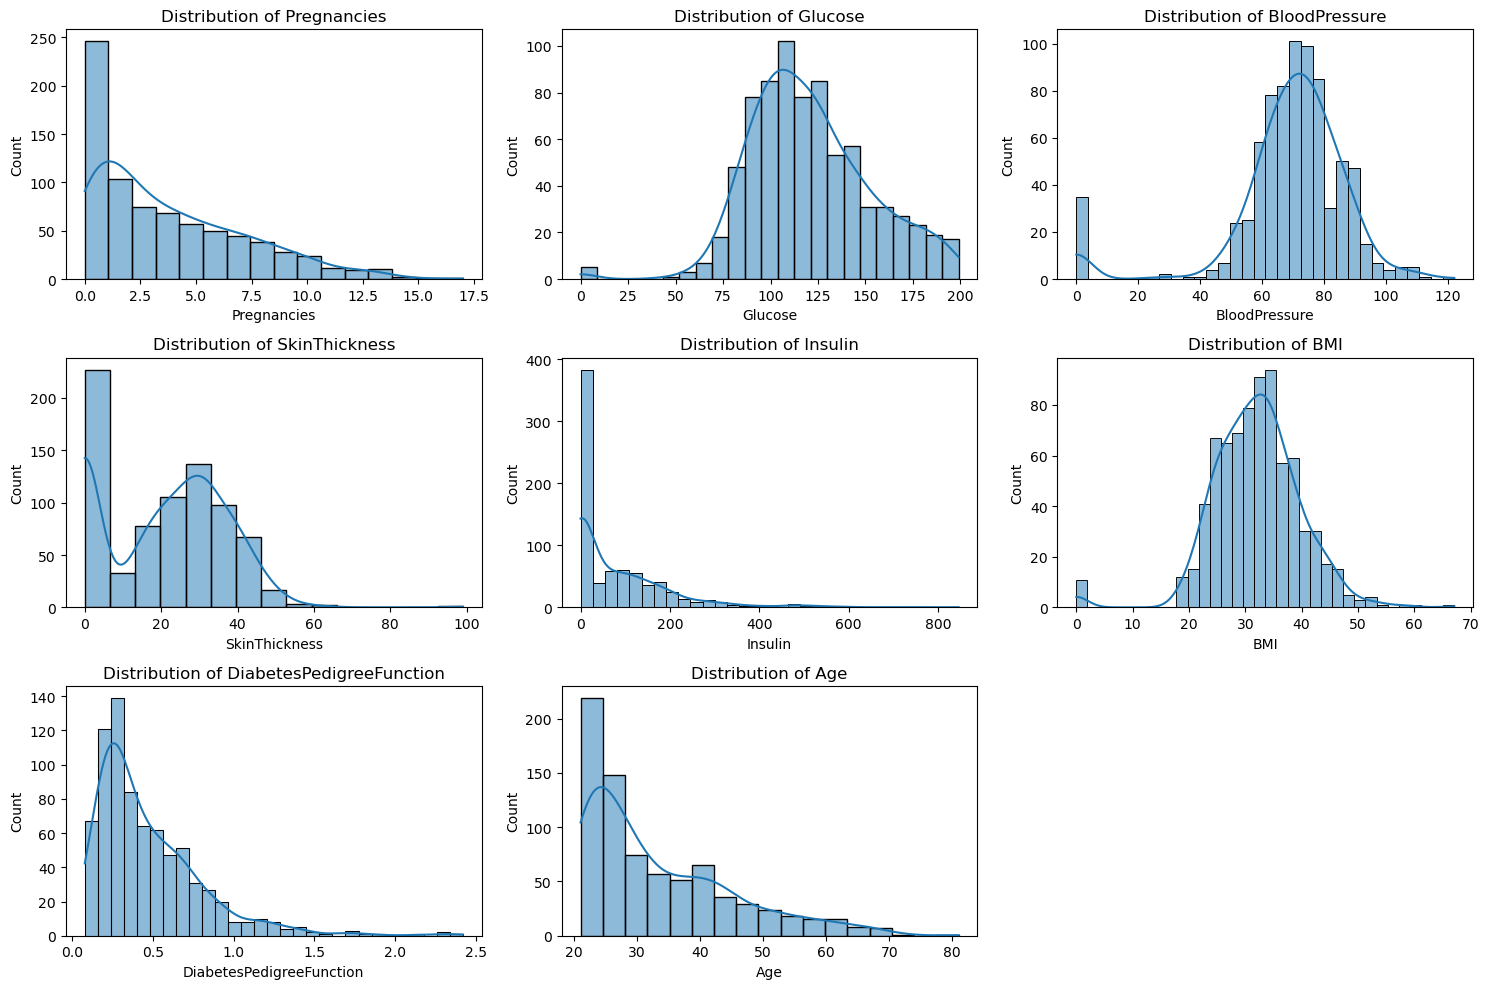

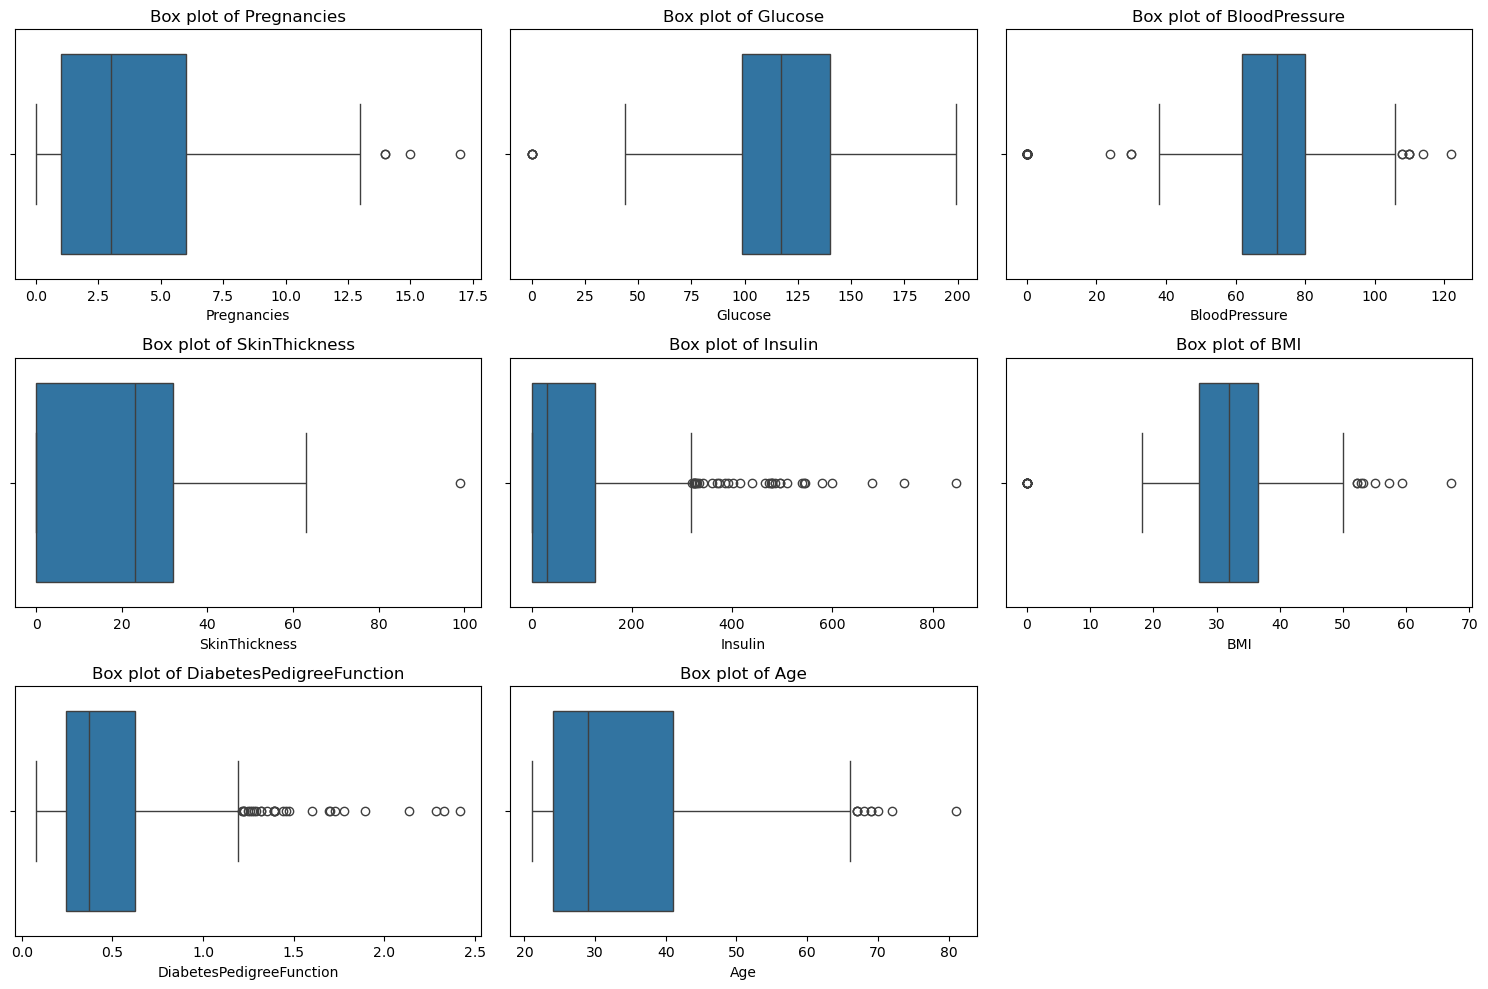

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_features.remove('Outcome')

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

**Reasoning**:
Create a correlation matrix heatmap and visualize the distribution of the target variable.



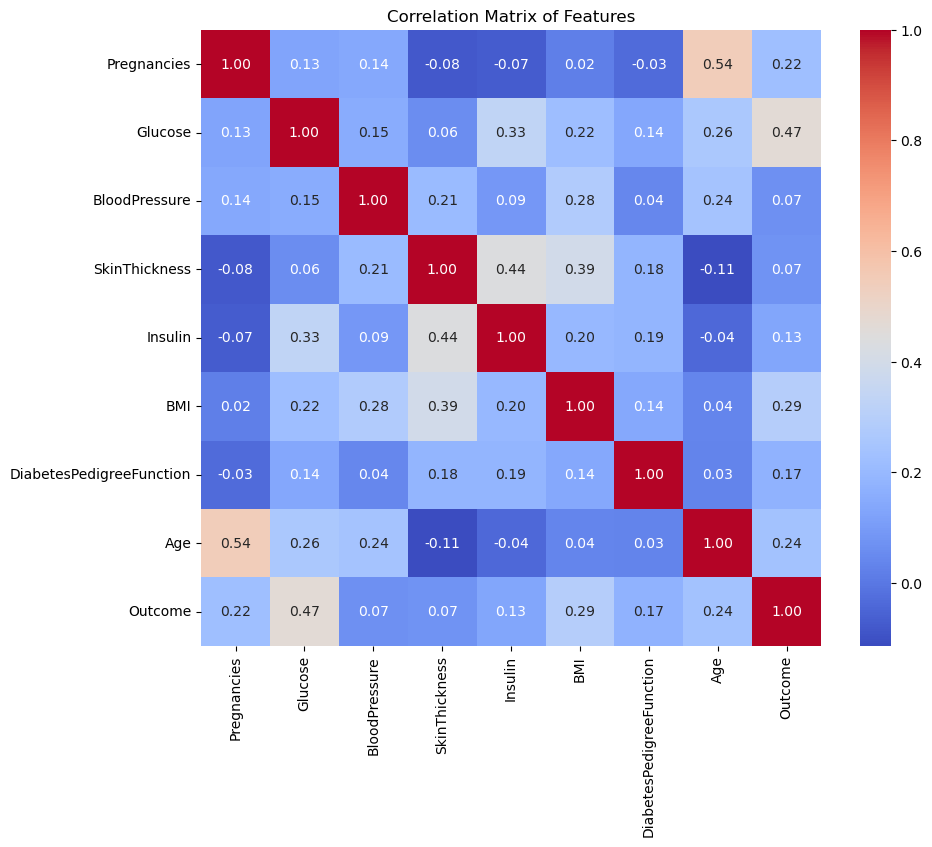

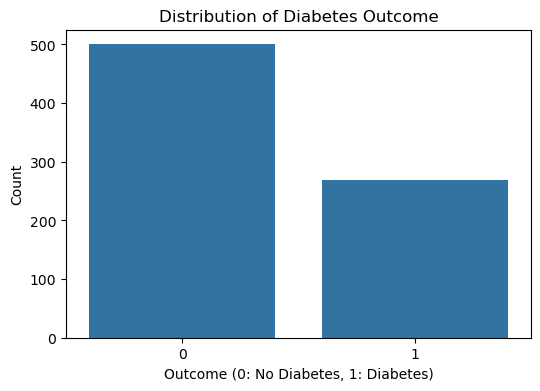

In [4]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
plt.ylabel('Count')
plt.show()

**Reasoning**:
Explore the relationship between individual numerical features and the target variable 'Outcome' using box plots.



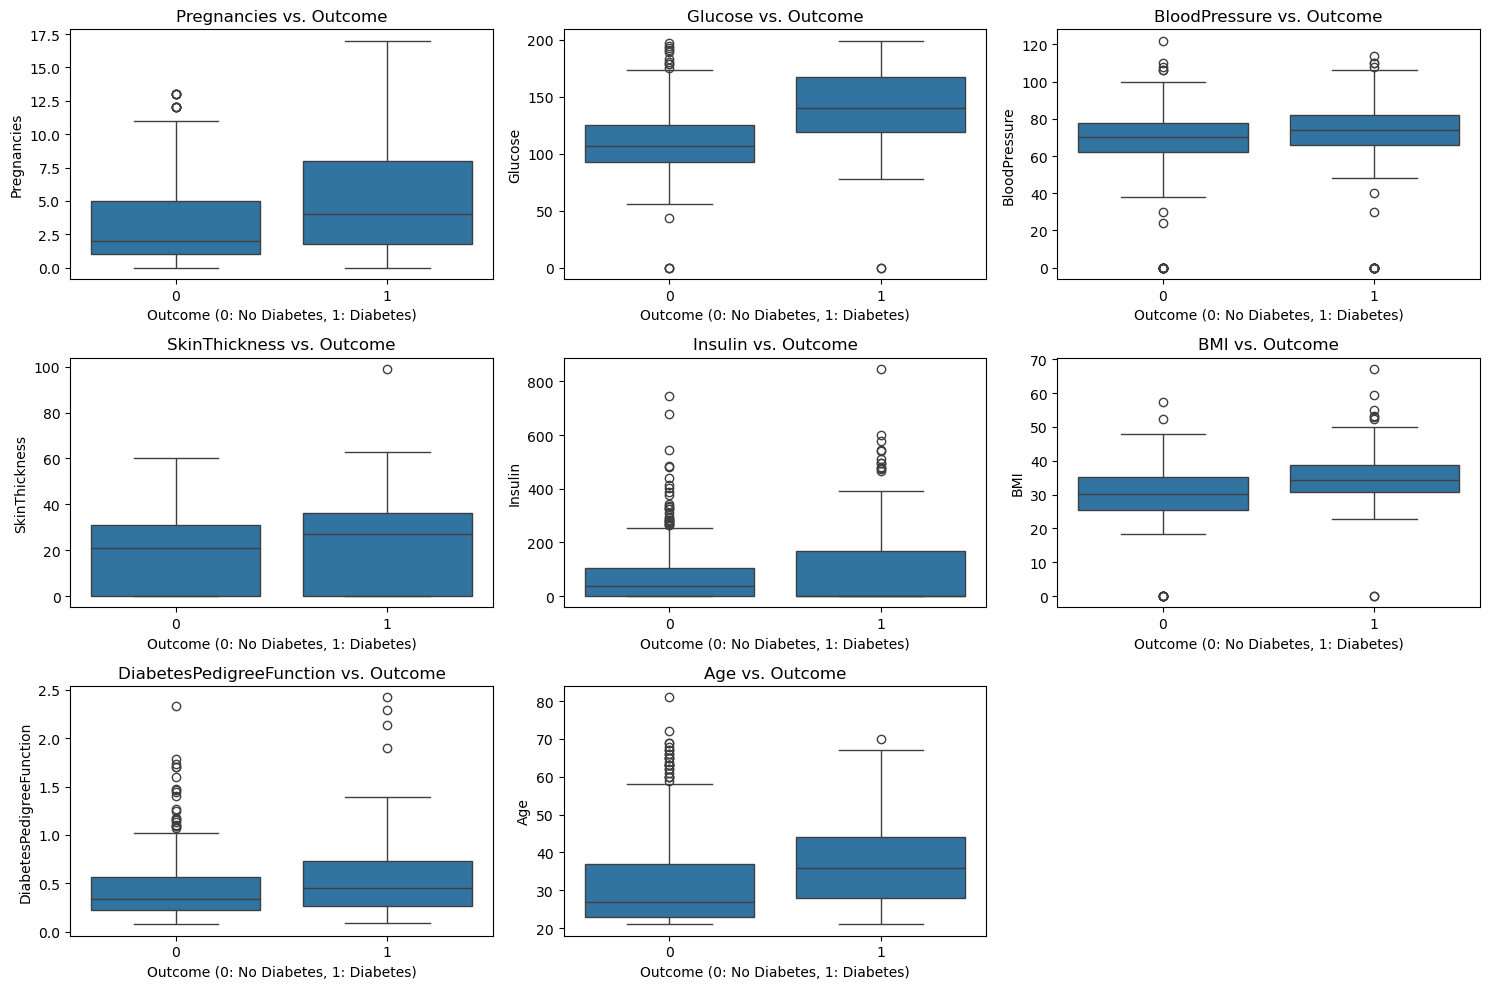

In [5]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Outcome', y=feature, data=df)
    plt.title(f'{feature} vs. Outcome')
    plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes)')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

## Preprocess the data

### Subtask:
Handle missing values, encode categorical variables, and apply any other necessary preprocessing steps.


**Reasoning**:
Identify and replace the biologically implausible zero values with NaN, then impute them with the median and scale the numerical features.



In [6]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Identify columns with biologically implausible zeros
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 values with NaN
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

# Impute missing values with the median
imputer = SimpleImputer(missing_values=np.nan, strategy='median')
df[cols_with_zeros] = imputer.fit_transform(df[cols_with_zeros])

# Scale the numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# Exclude the target variable 'Outcome' from scaling
numerical_features.remove('Outcome')

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,1
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,0
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,1
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,0
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1


## Split the data

### Subtask:
Split the preprocessed data into training and testing sets.


**Reasoning**:
Split the data into training and testing sets as instructed.



In [7]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


## Build and train models

### Subtask:
Build and train LightGBM and XGBoost models on the training data.


**Reasoning**:
Build and train LightGBM and XGBoost models on the training data as instructed.



In [8]:
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# Instantiate the models with default parameters
lgbm_model = LGBMClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

# Train the models
lgbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

print("LightGBM model trained.")
print("XGBoost model trained.")

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000111 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

## Evaluate models

### Subtask:
Evaluate the performance of both models on the testing data using appropriate metrics.


**Reasoning**:
Evaluate the performance of both models on the testing data using appropriate metrics.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Make predictions
lgbm_pred = lgbm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Make probability predictions for the positive class
lgbm_pred_proba = lgbm_model.predict_proba(X_test)[:, 1]
xgb_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate LightGBM model
lgbm_accuracy = accuracy_score(y_test, lgbm_pred)
lgbm_precision = precision_score(y_test, lgbm_pred)
lgbm_recall = recall_score(y_test, lgbm_pred)
lgbm_f1 = f1_score(y_test, lgbm_pred)
lgbm_roc_auc = roc_auc_score(y_test, lgbm_pred_proba)

print("LightGBM Model Performance:")
print(f"Accuracy: {lgbm_accuracy:.4f}")
print(f"Precision: {lgbm_precision:.4f}")
print(f"Recall: {lgbm_recall:.4f}")
print(f"F1-score: {lgbm_f1:.4f}")
print(f"ROC AUC Score: {lgbm_roc_auc:.4f}")
print("-" * 30)

# Evaluate XGBoost model
xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
xgb_roc_auc = roc_auc_score(y_test, xgb_pred_proba)

print("XGBoost Model Performance:")
print(f"Accuracy: {xgb_accuracy:.4f}")
print(f"Precision: {xgb_precision:.4f}")
print(f"Recall: {xgb_recall:.4f}")
print(f"F1-score: {xgb_f1:.4f}")
print(f"ROC AUC Score: {xgb_roc_auc:.4f}")

LightGBM Model Performance:
Accuracy: 0.7532
Precision: 0.6349
Recall: 0.7273
F1-score: 0.6780
ROC AUC Score: 0.7890
------------------------------
XGBoost Model Performance:
Accuracy: 0.7143
Precision: 0.5873
Recall: 0.6727
F1-score: 0.6271
ROC AUC Score: 0.7774


## Compare models

### Subtask:
Compare the performance metrics of LightGBM and XGBoost and interpret the results.


**Reasoning**:
Compare and interpret the performance metrics of LightGBM and XGBoost and summarize their strengths and weaknesses based on the evaluation metrics.



In [10]:
import pandas as pd

# Create a DataFrame to compare the metrics
metrics_data = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score', 'ROC AUC'],
    'LightGBM': [lgbm_accuracy, lgbm_precision, lgbm_recall, lgbm_f1, lgbm_roc_auc],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1, xgb_roc_auc]
}
metrics_df = pd.DataFrame(metrics_data)

print("Performance Comparison:")
display(metrics_df)

print("\nInterpretation of Results:")
print("Considering the class imbalance observed during EDA (more non-diabetic cases than diabetic cases), metrics like Precision, Recall, F1-score, and ROC AUC are more informative than Accuracy alone.")
print("\nLightGBM Performance:")
print(f"- Accuracy ({lgbm_accuracy:.4f}): Overall correctness of predictions.")
print(f"- Precision ({lgbm_precision:.4f}): Out of all predicted positive cases, {lgbm_precision:.1%} were actually positive. This indicates fewer false positives compared to XGBoost.")
print(f"- Recall ({lgbm_recall:.4f}): Out of all actual positive cases, LightGBM correctly identified {lgbm_recall:.1%}. This is slightly better than XGBoost, meaning it captures more true positives.")
print(f"- F1-score ({lgbm_f1:.4f}): Harmonic mean of Precision and Recall. LightGBM's higher F1-score suggests a better balance between avoiding false positives and false negatives.")
print(f"- ROC AUC ({lgbm_roc_auc:.4f}): Measures the ability of the model to distinguish between the two classes. LightGBM's higher ROC AUC indicates better discriminatory power.")

print("\nXGBoost Performance:")
print(f"- Accuracy ({xgb_accuracy:.4f}): Overall correctness of predictions.")
print(f"- Precision ({xgb_precision:.4f}): Out of all predicted positive cases, {xgb_precision:.1%} were actually positive. This is lower than LightGBM, suggesting more false positives.")
print(f"- Recall ({xgb_recall:.4f}): Out of all actual positive cases, XGBoost correctly identified {xgb_recall:.1%}. This is slightly lower than LightGBM.")
print(f"- F1-score ({xgb_f1:.4f}): Lower than LightGBM, indicating a less optimal balance between Precision and Recall.")
print(f"- ROC AUC ({xgb_roc_auc:.4f}): Lower than LightGBM, suggesting slightly less discriminatory power.")

print("\nSummary of Strengths and Weaknesses:")
print("LightGBM:")
print("- Strengths: Generally better performance across key metrics, particularly Precision, Recall, F1-score, and ROC AUC, indicating better handling of the imbalanced dataset and stronger discriminatory power.")
print("- Weaknesses: Slightly more complex to tune compared to simpler models, but performs well with default settings here.")

print("\nXGBoost:")
print("- Strengths: Also a strong gradient boosting model, providing competitive performance.")
print("- Weaknesses: Showed slightly lower performance than LightGBM on this specific dataset and split, particularly in minimizing false positives (lower Precision).")

Performance Comparison:


,Metric,LightGBM,XGBoost
0,Accuracy,0.753247,0.714286
1,Precision,0.634921,0.587302
2,Recall,0.727273,0.672727
3,F1-score,0.677966,0.627119
4,ROC AUC,0.788981,0.777410



Interpretation of Results:
Considering the class imbalance observed during EDA (more non-diabetic cases than diabetic cases), metrics like Precision, Recall, F1-score, and ROC AUC are more informative than Accuracy alone.

LightGBM Performance:
- Accuracy (0.7532): Overall correctness of predictions.
- Precision (0.6349): Out of all predicted positive cases, 63.5% were actually positive. This indicates fewer false positives compared to XGBoost.
- Recall (0.7273): Out of all actual positive cases, LightGBM correctly identified 72.7%. This is slightly better than XGBoost, meaning it captures more true positives.
- F1-score (0.6780): Harmonic mean of Precision and Recall. LightGBM's higher F1-score suggests a better balance between avoiding false positives and false negatives.
- ROC AUC (0.7890): Measures the ability of the model to distinguish between the two classes. LightGBM's higher ROC AUC indicates better discriminatory power.

XGBoost Performance:
- Accuracy (0.7143): Overall corr

## Summary:

### Data Analysis Key Findings

*   The dataset has no missing values in its raw form, but several features ('Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI') contained biologically implausible zero values which were treated as missing and imputed with the median.
*   The dataset is imbalanced, with more instances of the 'No Diabetes' outcome (Outcome=0) than the 'Diabetes' outcome (Outcome=1).
*   Features like 'Glucose', 'BMI', 'Age', and 'DiabetesPedigreeFunction' show noticeable differences in distributions between the 'No Diabetes' and 'Diabetes' groups.
*   After preprocessing (imputing zeros and scaling numerical features), the data was split into training (614 samples) and testing (154 samples) sets.
*   Both LightGBM and XGBoost models were successfully trained on the training data.
*   LightGBM achieved better performance than XGBoost on the test set across all evaluated metrics:
    *   Accuracy: LightGBM (0.7532) vs. XGBoost (0.7143)
    *   Precision: LightGBM (0.6349) vs. XGBoost (0.5873)
    *   Recall: LightGBM (0.7273) vs. XGBoost (0.6727)
    *   F1-score: LightGBM (0.6780) vs. XGBoost (0.6271)
    *   ROC AUC Score: LightGBM (0.7890) vs. XGBoost (0.7774)
*   LightGBM demonstrated better handling of the imbalanced dataset and superior discriminatory power based on its higher F1-score and ROC AUC score.


